# Affine transforms using clesperanto
This notebook demonstrates how to apply affine transforms to 3D images.

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('TX')

<NVIDIA GeForce GTX 1650 with Max-Q Design on Platform: NVIDIA CUDA (1 refs)>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [3]:
# Laod example data
np_array = imread('../../data/Haase_MRT_tfl3d1.tif')
np_array.shape

(192, 256, 256)

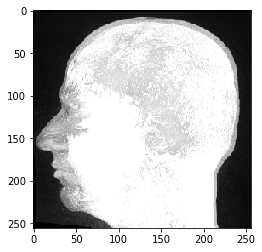

In [4]:
# push it to GPU memory
input_image = cle.push_zyx(np_array)

cle.imshow(input_image)

## Rotation
For rotating an image, you need to provide angles corresponding to axes.

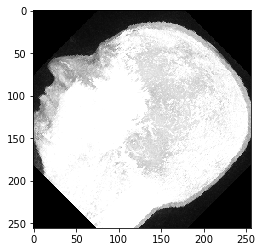

In [5]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=45)
cle.imshow(rotated)

Images are rotated around their center by default. You can change this by providing an additional parameter. The image will then be rotated around the origin.

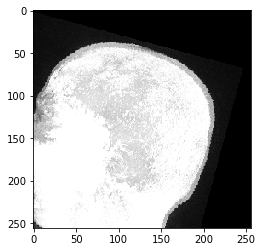

In [6]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=15, rotate_around_center=False)
cle.imshow(rotated)

## Translation
Images can be translate by providing translation distances along axes:

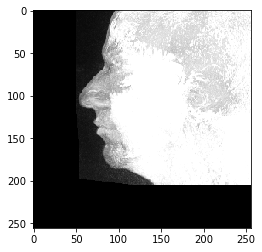

In [7]:
translated = cle.translate(input_image, translate_x=50, translate_y=-50)
cle.imshow(translated)

## Scaling
You can scale the image by providing scaling factors.

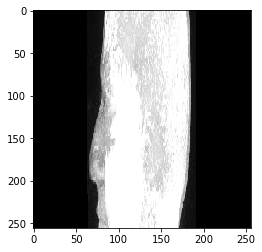

In [8]:
scaled = cle.scale(input_image, factor_x=0.5, factor_y=2)
cle.imshow(scaled)

In this context, the `auto_size` parameter might be useful:

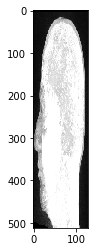

In [9]:
scaled_auto_size = cle.scale(input_image, factor_x=0.5, factor_y=2, auto_size=True)
cle.imshow(scaled_auto_size)

## Rigid transform
Rigid transforms allow to do translations and rotations in one shot

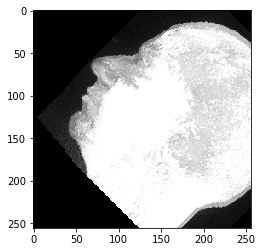

In [10]:
rigid_transformed = cle.rigid_transform(input_image, translate_x=50, angle_around_z_in_degrees=45)
cle.imshow(rigid_transformed)

## Affine transforms
To do translation, rotation, scaling and shearing in one shot, use affine transforms.

To setup an affine transform, you can do this using a 4x4 transform matrix:

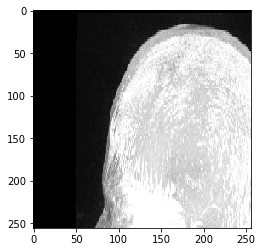

In [11]:
transform_matrix = np.asarray([
    [1, 0, 0, 50],
    [0, 2, 0, 0],
    [0, 0, 0.5, 0],
    [0, 0, 0, 1]
])
transformed_image = cle.affine_transform(input_image, transform=transform_matrix)
cle.imshow(transformed_image)

Alternatively, you can configure a transform object and pass it:

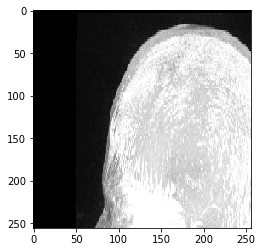

In [12]:
transform = cle.AffineTransform3D()
transform.translate(50)
transform.scale(1, 2, 0.5)

transformed_image = cle.affine_transform(input_image, transform=transform)
cle.imshow(transformed_image)

### Shearing
Providing the shear angle will shear the image in the desired plane

The shear is calculated using the shear angle by the following equation:

1.0/ tan(shear_angle_in_degrees * pi / 180)


yz


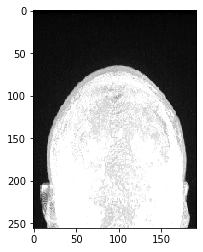

xz


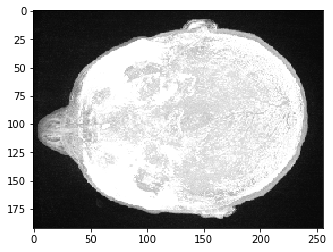

xy


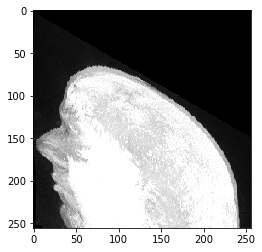

In [13]:
#For example, to shear the image in the Y axis along YZ plane using a shear angle of 30 degrees

shear_angle = 30.0

transform = cle.AffineTransform3D()
shear_transform= transform.shear_in_z_plane(angle_y_in_degrees=shear_angle)

transformed_image = cle.affine_transform(input_image, transform=shear_transform)

##display images in each plane
print("yz")
cle.imshow(cle.maximum_x_projection(transformed_image))
print("xz")
cle.imshow(cle.maximum_y_projection(transformed_image))
print("xy")
cle.imshow(cle.maximum_z_projection(transformed_image))

# Linear interpolation versus nearest neighbor interpolation
Let's crop the nose and transform it using different interpolation modes.

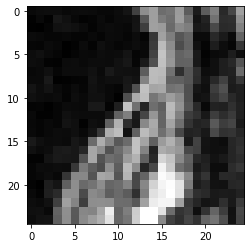

In [14]:
crop = input_image[50,125:150,45:70]

cle.imshow(crop)

# Nearest neighbor interpolation

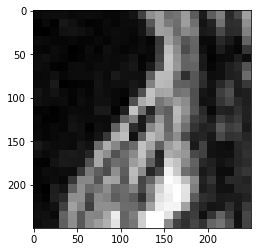

In [15]:
# create a larger image
rescaled = cle.create(np.asarray(crop.shape) * 10)

# fill it with a scaled version of the image; 
cle.scale(crop, rescaled, factor_x=10, factor_y=10, factor_z=10, linear_interpolation=False)
cle.imshow(rescaled)

### Linear interpolation

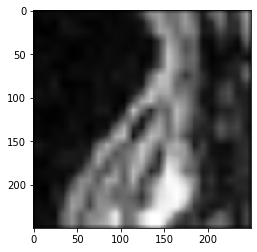

In [16]:
# fill it with a scaled version of the image; 
cle.scale(crop, rescaled, factor_x=10, factor_y=10, factor_z=10, linear_interpolation=True)
cle.imshow(rescaled)